In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "ticks")

In [ ]:
data = pd.read_csv('./states_all_extended.csv', sep=",")

In [ ]:
data.shape

(1715, 266)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
data.dtypes

In [ ]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

In [ ]:
totalCount = data.shape[0]
print("Всего строк: {}" .format(totalCount))

Всего строк: 1715


In [ ]:
catCols = []
for col in data.columns:
    tempNullCount = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if tempNullCount>0 and (dt=='float64'):
        catCols.append(col)
        temp_perc = round((tempNullCount / totalCount) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, tempNullCount, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка A_A_A. Тип данных float64. Количество пустых значений 83, 4.84%.
Колонка G01_A_A. Тип данных float64. Количество пустых з

In [ ]:
from sklearn.impute import SimpleImputer
from  sklearn.impute import MissingIndicator

In [ ]:
state_data = data[['STATE']]
state_data.head()

,STATE
0,ALABAMA
1,ALASKA
2,ARIZONA
3,ARKANSAS
4,CALIFORNIA


In [ ]:
state_data['STATE'].unique()

In [ ]:
state_data[state_data['STATE'].isnull()].shape

(0, 1)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data_imp = imp.fit_transform(state_data)
data_imp

In [ ]:
np.unique(data_imp)

In [ ]:
data_imp.shape

(1715, 1)

In [ ]:
state_enc = pd.DataFrame({"STATE": data_imp.T[0]})
state_enc

,STATE
0,ALABAMA
1,ALASKA
2,ARIZONA
3,ARKANSAS
4,CALIFORNIA
...,...
1710,VIRGINIA
1711,WASHINGTON
1712,WEST_VIRGINIA
1713,WISCONSIN


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
state_ohe = ohe.fit_transform(state_enc[['STATE']])

In [ ]:
state_ohe.shape

(1715, 53)

In [ ]:
state_ohe.todense()[0:10]

In [ ]:
pd.get_dummies(state_enc).head()

,STATE_ALABAMA,STATE_ALASKA,STATE_ARIZONA,STATE_ARKANSAS,STATE_CALIFORNIA,STATE_COLORADO,STATE_CONNECTICUT,STATE_DELAWARE,STATE_DISTRICT_OF_COLUMBIA,STATE_DODEA,...,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(state_data, dummy_na=True).head()

,STATE_ALABAMA,STATE_ALASKA,STATE_ARIZONA,STATE_ARKANSAS,STATE_CALIFORNIA,STATE_COLORADO,STATE_CONNECTICUT,STATE_DELAWARE,STATE_DISTRICT_OF_COLUMBIA,STATE_DODEA,...,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING,STATE_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
state_enc["STATE"].unique()

In [ ]:
le = LabelEncoder()
state_le = le.fit_transform(state_enc["STATE"])

In [ ]:
state_le

In [ ]:
np.unique(state_le)

In [ ]:
le.inverse_transform([n for n in range(17)])

In [ ]:
data_digit = state_enc.copy()
data_digit["STATE"] = state_le

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[["STATE"]])

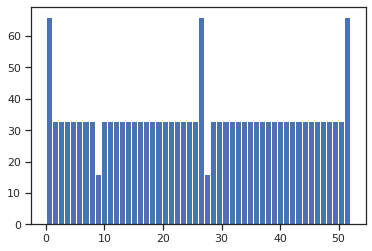

In [ ]:
plt.hist(data_digit["STATE"], 50)
plt.show()

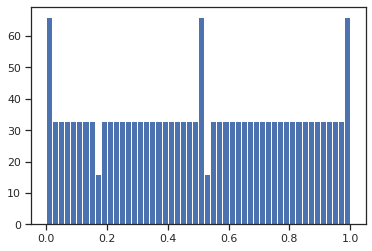

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_digit[["STATE"]])

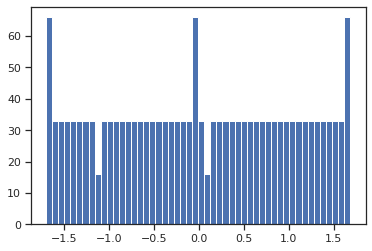

In [ ]:
plt.hist(sc2_data, 50)
plt.show()

In [ ]:
sns.pairplot(data)